# Behaviour analysis of bonsai VR

In [90]:
from aeon.io.reader import Csv, Reader
import aeon.io.api as aeon
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import importlib as imp
import parse_bonsai_functions
imp.reload(parse_bonsai_functions)

<module 'parse_bonsai_functions' from '/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py'>

## Parse mouse and date info into root session folder

In [92]:
mouse_id = "005"
date = "20251022"
root = "/Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/"
session_path = parse_bonsai_functions.find_base_path(mouse_id, date, root)

Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-005/ses-2LM010_date-20251022T153224


## Load all the relevant files
- settings (session and rig)
- events (odour phases)
- licks
- rewards
- position
- speed
- (analog data for precise timing)
- (optional cameras)

In [93]:
ses_settings, ses_rig_settings = parse_bonsai_functions.load_settings(session_path)

Save all event logs into pandas dataframe

In [94]:
sess_dataframe = parse_bonsai_functions.load_data(session_path)

Sanity check:

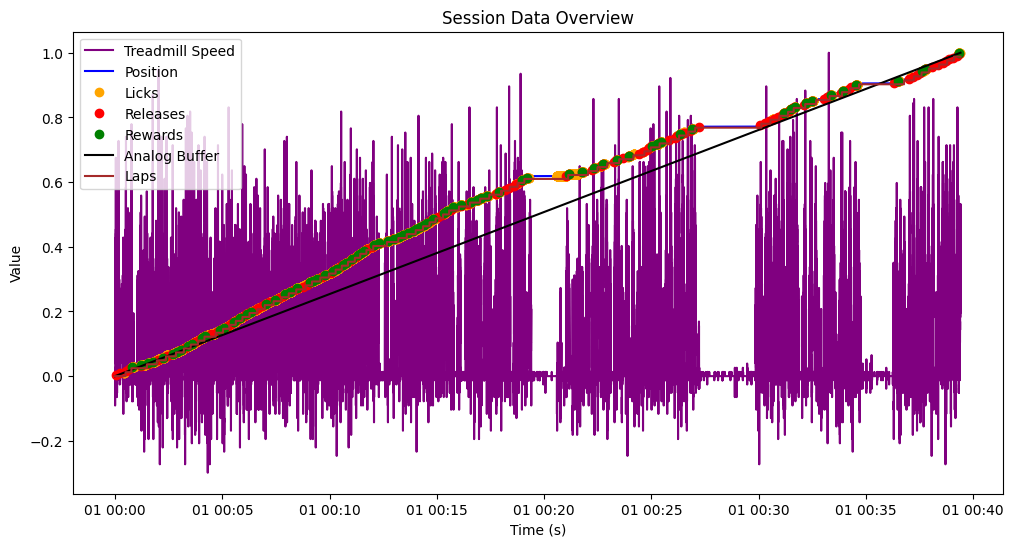

In [95]:
parse_bonsai_functions.plot_ethogram(sess_dataframe,ses_settings)

In [96]:
parse_bonsai_functions.print_sess_summary(sess_dataframe,ses_settings)

rewarded odours: ['odour19'], rewarded textures: ['waves']
non-rewarded odours: ['odour6'], non-rewarded textures: ['grating1']
Session Summary:
Total Licks: 4325
Total Landmarks: 164
Total Rewards: 82
Hit Rate: 96.47%, False Alarm Rate: 49.37%, D-prime: 1.45
Targets Licked: 82 of 85, Distractors Licked: 39 of 79


rewarded odours: ['odour19'], rewarded textures: ['waves']
non-rewarded odours: ['odour6'], non-rewarded textures: ['grating1']


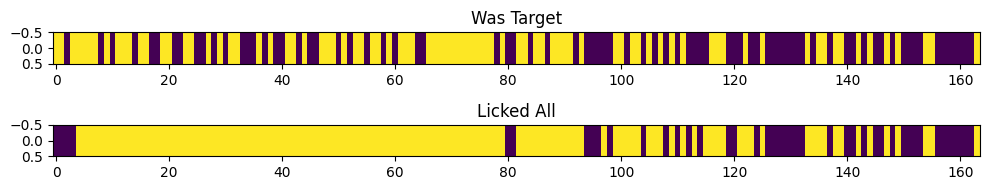

In [97]:
parse_bonsai_functions.plot_lick_lm(sess_dataframe,ses_settings)

rewarded odours: ['odour19'], rewarded textures: ['waves']
non-rewarded odours: ['odour6'], non-rewarded textures: ['grating1']


/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:281: RuntimeWarning: invalid value encountered in scalar divide
  false_alarm_rate_window[i] = np.sum(licked_all[i:i+window][was_target[i:i+window]==0])/all_window_distractors


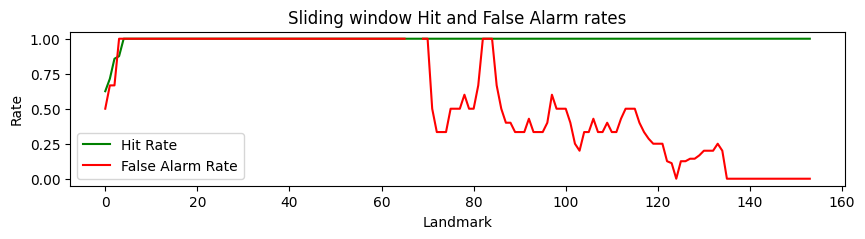

In [98]:
parse_bonsai_functions.plot_sw_hit_fa(sess_dataframe,ses_settings,window=10)

## Stable world plots

rewarded odours: ['odour13' 'odour17' 'odour18' 'odour6'], rewarded textures: ['grating1' 'grating2' 'leaves' 'light_squares']
non-rewarded odours: ['odour1' 'odour11' 'odour12' 'odour14' 'odour19' 'odour4'], non-rewarded textures: ['dark_squares' 'dots' 'grass' 'logs' 'tiles' 'waves']


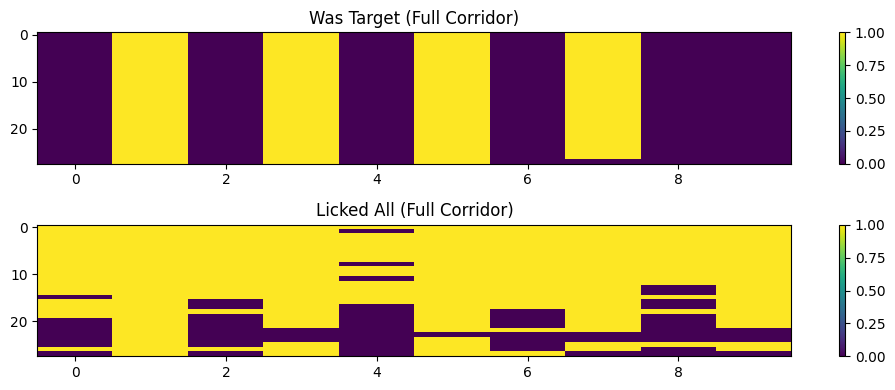

In [75]:
parse_bonsai_functions.plot_full_corr(sess_dataframe,ses_settings)